## Simple reaction profile plot (Gibbs free energy)
Let's plot the adsorption and disociation of CO<sub>(g)</sub> on a Ni(100) surface with data from DFT calculations (RPBE). That is, the two steps:
* Adsorption: CO<sub>(g)</sub> + * -> *CO
* Direct dissociation: *CO + * -> *C + *O

First import the package and create items for the gas, clean surface and adsorbed surfaces with 

In [1]:
# load species
import stegoplot.item_types as Model

# CO in empty cubic box: CO(g)
COg = Model.GasItem(Name="CO(g)", 
                    E0=-14.42576166, # DFT energy, eV
                    FreqR=[2104.300781], # Real frequencies, cm-1
                    Geometry='Diatomic heteronuclear', 
                    Mass=28.01, # Atomic mass, g/mol
                    RotT=2.77, # Rotational temperature, K
                    RotSymNum=1 # Rotational symmetry number = 1 (diatomic heteronuclear)
                   )
# Clean Ni(100) surface
N100 = Model.CleanSurf(Name='Ni100', E0=-291.86035891)

# Adsorbed CO/Ni(100)
N100_CO = Model.AdsItem(Name='N10/R17i CO.h', E0=-307.82811536,
                        FreqR=[1597.286883, 238.05862, 229.727279, 199.589309, 147.878114, 117.974835])
# Transition state CO -> C + O /Ni(100)
N100_CO_TS = Model.AdsItem(Name='N10/R17d CO.h -> C.h + O.h', E0=-305.94631980, 
                           FreqR=[593.036612, 551.302284, 450.144514, 344.84786, 250.855827], 
                           FreqI=[367.384136] # Imaginary frequency, cm-1 (not used, may be omited)
                          )
# Co-Adsorbed C+O/Ni(100) 
N100_C_O = Model.AdsItem(Name='N10/R17f C.h + O.h', E0=-307.69629330, 
                         FreqR=[672.032831, 640.703844, 400.586463, 342.050762, 328.190997, 259.747561])


>> Loading clases ... base, gas, clean surface, adsorbed ... done


#### Let's start the plot.
Import the `matplotlib` and `stegoplot.plot` tools. Then create a plot and a reference that will be used as anchor from where the reaction steps and branches will concatenate. Now we can star adding reaction steps.

>> Loading Plot tools...Ok
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = 0.01
    > Adding reaction step to current plot...................................................... CO adsorption
        > Delta E = -47.39
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = 1.0
  >> N10/R17d CO.h -> C.h + O.h, Gibbs : -3.05907e+02
T = 538.15 , P = 1.0
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = 1.0
    > Adding reaction step to current plot...................................................... CO adsorption
        > Ea(f)=192.00 ; Ea(b)=192.00 ; Delta E = 192.00


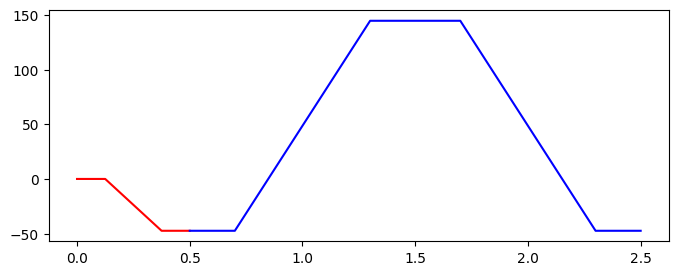

In [2]:
# load packages
import matplotlib.pyplot as plt
import stegoplot.Plot as stgplt

# create 
fig, axs = plt.subplots(1, 1, figsize=(8., 3.)) # plot
MyRef = stgplt.RxRef() # reference (anchor)

#### Adding reaction steps
# CO adsorption
stgplt.RxStepTS(
    [
    [N100,COg], # initial states: CO(g) + clean Ni(100)
    N100_CO # final state: adsorbed *CO/Ni(100)
    ],
    Ref=MyRef, # add step to this reference point
    ThermoType='Gibbs', T = 265 + 273.15, P=0.01, # consider Gibbs free energies at this conditions
    Name='CO adsorption', # give it a descriptive name
    Color='r', StepSpan=.5, LineStyle="solid", LineWidth=1.5, AlphaLines=1. # some options for the line/step
)
# CO direct disociation
stgplt.RxStepTS(
    [
    N100_CO, # initial
    N100_CO_TS, # transition state
    N100_CO # final
    ],
    Ref=MyRef, ThermoType='Gibbs', T = 265 + 273.15, P=1.,
    Name='CO adsorption', Color='b', AlphaLines=1.)



For a smooth plot, a spine can be ploted with the `PlotShape='Spline'` option but the `scipy` package is required:

  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = 1.0
    > Adding reaction step to current plot...................................................... CO adsorption
        > Delta E = -68.00
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = None
  >> N10/R17d CO.h -> C.h + O.h, Gibbs : -3.05907e+02
T = 538.15 , P = None
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = None
    > Adding reaction step to current plot...................................................... CO disociation
        > Ea(f)=192.00 ; Ea(b)=192.00 ; Delta E = 192.00


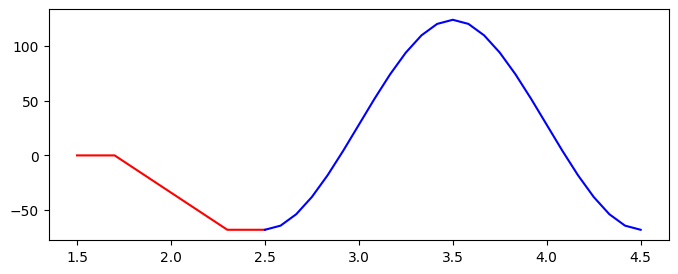

In [3]:
# plot base
import matplotlib.pyplot as plt
import stegoplot.Plot as stgplt

fig, axs = plt.subplots(1, 1, figsize=(8., 3.))
MyRef = stgplt.RxRef(1.5, 0.)

# Adding to plot
stgplt.RxStepTS([ [N100,COg], N100_CO ], Ref=MyRef, ThermoType='Gibbs', T = 265 + 273.15, P=1.,
    Name='CO adsorption', Hover=True, Color='r', AlphaLines=1.)
stgplt.RxStepTS([ N100_CO, N100_CO_TS, N100_CO ], Ref=MyRef, ThermoType='Gibbs', T = 265 + 273.15, 
    Name='CO disociation', Hover=True, Color='b', AlphaLines=1., PlotShape='Spline')


  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = 1.0
    > Adding reaction step to current plot...................................................... CO adsorption
        > Delta E = -68.00
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = None
  >> N10/R17d CO.h -> C.h + O.h, Gibbs : -3.05907e+02
T = 538.15 , P = None
  >> N10/R17i CO.h, Gibbs : -3.07896e+02
T = 538.15 , P = None
    > Adding reaction step to current plot...................................................... CO disociation
        > Ea(f)=192.00 ; Ea(b)=192.00 ; Delta E = 192.00


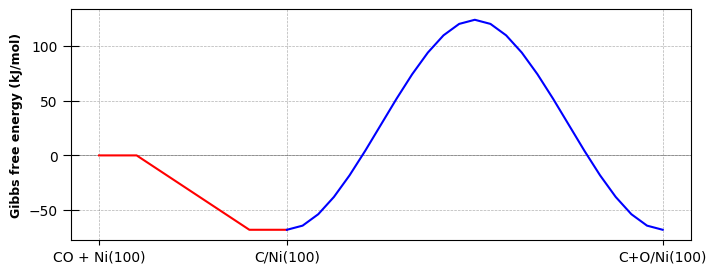

In [6]:
# plot base
import matplotlib.pyplot as plt
import stegoplot.Plot as stgplt

fig, axs = plt.subplots(1, 1, figsize=(8., 3.))
MyRef = stgplt.RxRef(1.5, 0.)

# Adding to plot
stgplt.RxStepTS([ [N100,COg], N100_CO ], Ref=MyRef, ThermoType='Gibbs', T = 265 + 273.15, P=1.,
    Name='CO adsorption', Hover=True, Color='r', AlphaLines=1.)
stgplt.RxStepTS([ N100_CO, N100_CO_TS, N100_CO ], Ref=MyRef, ThermoType='Gibbs', T = 265 + 273.15, 
    Name='CO disociation', Hover=True, Color='b', AlphaLines=1., PlotShape='Spline')

# Make it nicer
plt.ylabel("Gibbs free energy (kJ/mol)", fontweight='bold', fontsize='9')
plt.tick_params(axis="y", direction="inout", length=12.)
plt.axhline(y=0., color="k", alpha=.5, linewidth=.4)
axs.set_xticks([i[0] for i in MyRef.log])
axs.set_xticklabels(['CO + Ni(100)', 'C/Ni(100)', 'C+O/Ni(100)'])
plt.grid(which='major', color='k', linestyle='dashed', linewidth=.5, alpha=.3)